In [7]:

# implementation 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
pd.set_option('display.max_columns', 70)

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
import pandas as pd

titanic = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-ds-033020-lectures/master/Mod_3/knn/cleaned_titanic.csv', index_col='PassengerId')
titanic['youngin'] = titanic['youngin'].astype('int')

In [6]:
# Split data to be used in the models
# Create matrix of features
X = titanic.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = titanic['Survived'] # y is the column we're trying to predict

In [16]:
polynomial_features_2= PolynomialFeatures(degree=2, include_bias=False)


In [17]:
X_poly = polynomial_features_2.fit_transform(X)
poly_columns = polynomial_features_2.get_feature_names(X.columns)

In [18]:
X_poly  = pd.DataFrame(X_poly , columns=poly_columns)
X_poly.head()

,Pclass,Age,SibSp,Parch,Fare,youngin,male,Q,S,Pclass^2,Pclass Age,Pclass SibSp,Pclass Parch,Pclass Fare,Pclass youngin,Pclass male,Pclass Q,Pclass S,Age^2,Age SibSp,Age Parch,Age Fare,Age youngin,Age male,Age Q,Age S,SibSp^2,SibSp Parch,SibSp Fare,SibSp youngin,SibSp male,SibSp Q,SibSp S,Parch^2,Parch Fare,Parch youngin,Parch male,Parch Q,Parch S,Fare^2,Fare youngin,Fare male,Fare Q,Fare S,youngin^2,youngin male,youngin Q,youngin S,male^2,male Q,male S,Q^2,Q S,S^2
0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,1.0,9.0,66.0,3.0,0.0,21.7500,0.0,3.0,0.0,3.0,484.0,22.0,0.0,159.5000,0.0,22.0,0.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,52.562500,0.0,7.25,0.0,7.250,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,1444.0,38.0,0.0,2708.7654,0.0,0.0,0.0,0.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5081.308859,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,9.0,78.0,0.0,0.0,23.7750,0.0,0.0,0.0,3.0,676.0,0.0,0.0,206.0500,0.0,0.0,0.0,26.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.805625,0.0,0.00,0.0,7.925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,1225.0,35.0,0.0,1858.5000,0.0,0.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2819.610000,0.0,0.00,0.0,53.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,1.0,9.0,105.0,0.0,0.0,24.1500,0.0,3.0,0.0,3.0,1225.0,0.0,0.0,281.7500,0.0,35.0,0.0,35.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.802500,0.0,8.05,0.0,8.050,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


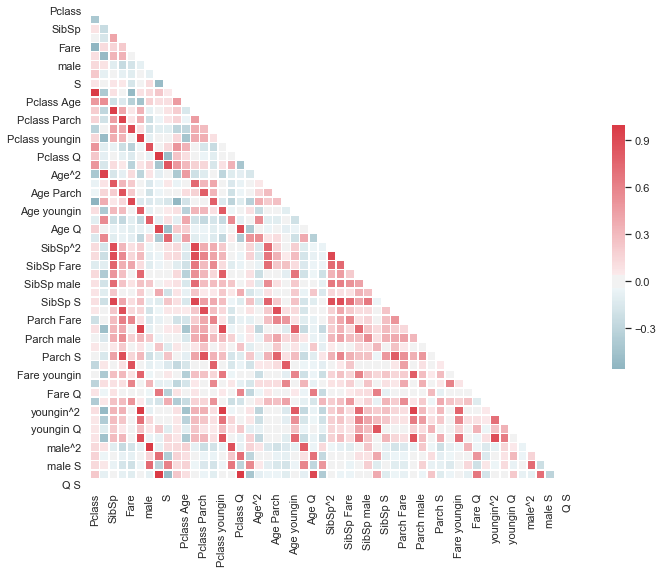

In [19]:
sns.set(style="white")


# Compute the correlation matrix
corr = X_poly.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
# Create correlation matrix
corr_matrix = X_poly.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,Pclass,Age,SibSp,Parch,Fare,youngin,male,Q,S,Pclass^2,Pclass Age,Pclass SibSp,Pclass Parch,Pclass Fare,Pclass youngin,Pclass male,Pclass Q,Pclass S,Age^2,Age SibSp,Age Parch,Age Fare,Age youngin,Age male,Age Q,Age S,SibSp^2,SibSp Parch,SibSp Fare,SibSp youngin,SibSp male,SibSp Q,SibSp S,Parch^2,Parch Fare,Parch youngin,Parch male,Parch Q,Parch S,Fare^2,Fare youngin,Fare male,Fare Q,Fare S,youngin^2,youngin male,youngin Q,youngin S,male^2,male Q,male S,Q^2,Q S,S^2
Pclass,NaN,0.405549,0.081656,0.016824,0.548193,0.104190,0.127741,0.220558,0.076466,0.993284,0.477301,0.194339,0.160620,0.317122,0.141809,0.501639,0.235594,0.497822,0.405303,0.066361,0.040453,0.563423,0.106688,0.101962,0.187702,0.133358,0.122429,0.124839,0.121130,0.130312,0.088556,0.072570,0.100380,0.054779,0.212234,0.087608,0.004332,0.060982,0.039831,0.283651,0.006150,0.307680,0.074089,0.377868,0.104190,0.065358,0.055478,0.075229,0.127741,0.162164,0.131041,0.220558,NaN,0.076466
Age,NaN,NaN,0.242807,0.170089,0.120938,0.517150,0.083730,0.080875,0.013598,0.397380,0.547827,0.278138,0.192551,0.020461,0.501789,0.102045,0.089588,0.155495,0.952684,0.074841,0.155352,0.369975,0.388210,0.554774,0.013247,0.571350,0.177076,0.223325,0.100850,0.379725,0.189881,0.107698,0.210078,0.031981,0.021493,0.479864,0.144809,0.017762,0.150332,0.060165,0.398010,0.106764,0.041303,0.058655,0.517150,0.369544,0.121038,0.453500,0.083730,0.038506,0.056530,0.080875,NaN,0.013598
SibSp,NaN,NaN,NaN,0.414542,0.160887,0.330293,0.116348,0.026692,0.069438,0.085931,0.207735,0.974283,0.447549,0.426091,0.358753,0.071212,0.030169,0.111562,0.170268,0.823328,0.196140,0.053909,0.306183,0.216614,0.061042,0.105437,0.881671,0.880982,0.759063,0.500619,0.726267,0.228826,0.927300,0.230900,0.281970,0.328443,0.370575,0.057643,0.429773,0.032466,0.274142,0.094406,0.083622,0.257639,0.330293,0.285900,0.211839,0.291855,0.116348,0.017057,0.067642,0.026692,NaN,0.069438
Parch,NaN,NaN,NaN,NaN,0.217532,0.346635,0.247508,0.081585,0.061512,0.016484,0.133801,0.400555,0.944555,0.392622,0.332526,0.224228,0.078886,0.064870,0.087963,0.315126,0.849833,0.137806,0.294849,0.273704,0.074582,0.062866,0.320331,0.562534,0.360956,0.275563,0.254191,0.024159,0.411382,0.874698,0.619486,0.384992,0.540849,0.211702,0.887374,0.098984,0.306256,0.098136,0.020580,0.295555,0.346635,0.237868,0.051491,0.319470,0.247508,0.071040,0.174840,0.081585,NaN,0.061512
Fare,NaN,NaN,NaN,NaN,NaN,0.008379,0.179958,0.116684,0.163758,0.518321,0.340080,0.062695,0.068755,0.909252,0.026485,0.320516,0.124026,0.317594,0.124850,0.216877,0.218098,0.915077,0.014188,0.100407,0.105209,0.096499,0.101183,0.149266,0.412955,0.001683,0.081588,0.004786,0.119534,0.130052,0.584153,0.010266,0.172737,0.012433,0.153882,0.866095,0.079512,0.600099,0.015989,0.510889,0.008379,0.003584,0.004022,0.001711,0.179958,0.080826,0.207436,0.116684,NaN,0.163758
youngin,NaN,NaN,NaN,NaN,NaN,NaN,0.076252,0.021512,0.040392,0.095793,0.450017,0.342410,0.353128,0.105895,0.975276,0.044231,0.019381,0.072309,0.300358,0.037465,0.034359,0.134128,0.813867,0.267628,0.065881,0.282117,0.192279,0.298199,0.119316,0.746455,0.259781,0.194758,0.270745,0.144344,0.104191,0.932918,0.301518,0.069037,0.309346,0.030607,0.762911,0.003537,0.035769,0.050270,1.000000,0.705735,0.245536,0.882095,0.076252,0.024016,0.042008,0.021512,NaN,0.040392
male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075217,0.121405,0.131843,0.173907,0.082424,0.221790,0.185347,0.078243,0.867233,0.072493,0.161356,0.075746,0.144453,0.199376,0.141902,0.080499,0.799071,0.055060,0.130360,0.038549,0.087380,0.108696,0.021002,0.233383,0.027175,0.090338,0.181811,0.129879,0.076694,0.222525,0.040944,0.209780,0.077515,0.040138,0.331042,0.040576,0.125189,0.076252,0.142093,0.049437,0.059933,1.000000,0.161690,0.729575,0.075217,NaN,0.121405
Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499261,0.229168,0.103448,0.007634,0.056168,0.100328,0.012337,0.001700,0.991406,0.420679,0.088276,0.054624,0.056467,0.111645,0.002904,0.088859,0.922553,0.377009,0.017411,0.052160,0.049320,0.038161,0.016014,0.388075,0.119612,0.03

In [21]:
# Find index of feature columns with correlation greater than 0.90
#want to drop squared categoricals made by polys like Q'2 and s'2
to_drop = [column for column in upper.columns if any(upper[column] > 0.97)]
X_poly.drop(columns=to_drop, inplace=True)


In [22]:
X_poly.head()

,Pclass,Age,SibSp,Parch,Fare,youngin,male,Q,S,Pclass Age,Pclass Parch,Pclass Fare,Pclass male,Pclass S,Age^2,Age SibSp,Age Parch,Age Fare,Age youngin,Age male,Age Q,Age S,SibSp^2,SibSp Parch,SibSp Fare,SibSp youngin,SibSp male,SibSp Q,SibSp S,Parch^2,Parch Fare,Parch youngin,Parch male,Parch Q,Parch S,Fare^2,Fare youngin,Fare male,Fare Q,Fare S,youngin male,youngin Q,youngin S,male Q,male S,Q S
0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,1.0,66.0,0.0,21.7500,3.0,3.0,484.0,22.0,0.0,159.5000,0.0,22.0,0.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,52.562500,0.0,7.25,0.0,7.250,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,38.0,0.0,71.2833,0.0,0.0,1444.0,38.0,0.0,2708.7654,0.0,0.0,0.0,0.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5081.308859,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,78.0,0.0,23.7750,0.0,3.0,676.0,0.0,0.0,206.0500,0.0,0.0,0.0,26.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.805625,0.0,0.00,0.0,7.925,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,35.0,0.0,53.1000,0.0,1.0,1225.0,35.0,0.0,1858.5000,0.0,0.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2819.610000,0.0,0.00,0.0,53.100,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,1.0,105.0,0.0,24.1500,3.0,3.0,1225.0,0.0,0.0,281.7500,0.0,35.0,0.0,35.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.802500,0.0,8.05,0.0,8.050,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
X_poly.shape

(889, 46)

In [24]:
X_poly.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'youngin', 'male', 'Q', 'S',
       'Pclass Age', 'Pclass Parch', 'Pclass Fare', 'Pclass male', 'Pclass S',
       'Age^2', 'Age SibSp', 'Age Parch', 'Age Fare', 'Age youngin',
       'Age male', 'Age Q', 'Age S', 'SibSp^2', 'SibSp Parch', 'SibSp Fare',
       'SibSp youngin', 'SibSp male', 'SibSp Q', 'SibSp S', 'Parch^2',
       'Parch Fare', 'Parch youngin', 'Parch male', 'Parch Q', 'Parch S',
       'Fare^2', 'Fare youngin', 'Fare male', 'Fare Q', 'Fare S',
       'youngin male', 'youngin Q', 'youngin S', 'male Q', 'male S', 'Q S'],
      dtype='object')

In [25]:
# Use x and y variables to split the training data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=1)

In [26]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

In [29]:
lr_acc = metrics.accuracy_score(y_test, y_pred_class)
print('Accuracy Score:', lr_acc)
#no training, selection, regularization

Accuracy Score: 0.8116591928251121


In [30]:
logreg.coef_

array([[-9.90595068e-01, -2.07664127e-01,  3.32411590e-03,
         1.27392286e+00,  4.63798196e-01,  4.46124877e-01,
        -1.46116698e+00,  2.40415533e-01, -5.69903131e-01,
        -3.02784917e-01, -5.70902961e-01,  2.75012430e-01,
         1.06530358e+00,  5.17853842e-02, -2.28803470e-01,
         2.45219473e-01, -4.40877791e-01,  3.31778054e-01,
        -2.33303200e-01, -2.43163358e-01,  2.16016586e-01,
         9.68274725e-01, -6.81532679e-01,  4.27555697e-01,
         4.39007489e-01, -4.38522889e-01, -2.06850005e-01,
         3.76132307e-01, -5.81273161e-01, -9.19421145e-04,
        -4.16138306e-01,  3.91771983e-01, -1.61384632e-01,
        -1.06427392e+00, -3.33251033e-01, -7.52101321e-01,
        -3.26106789e-01, -1.12016858e-01,  7.11896177e-02,
        -1.15743827e-01,  9.04638496e-01, -3.29157492e-01,
        -1.71950478e-02, -6.87932021e-01, -4.87006221e-01,
         0.00000000e+00]])

In [31]:
lr_coef_df = pd.DataFrame(data=logreg.coef_)
lr_coef_df.columns = X_poly.columns

In [32]:
lr_coef_df.T

,0
Pclass,-0.990595
Age,-0.207664
SibSp,0.003324
Parch,1.273923
Fare,0.463798
youngin,0.446125
male,-1.461167
Q,0.240416
S,-0.569903
Pclass Age,-0.302785


In [33]:
lr_coef_df = lr_coef_df.T.sort_values(by=0).T

In [34]:
sorted_df = lr_coef_df.T

In [35]:
sorted_df.shape

(46, 1)

In [36]:
sorted_df.iloc[sorted_df[0].abs().argsort()][::-1].head(10)
#most important features when trying to predict if someone will survive

,0
male,-1.461167
Parch,1.273923
Pclass male,1.065304
Parch Q,-1.064274
Pclass,-0.990595
Age S,0.968275
youngin male,0.904638
Fare^2,-0.752101
male Q,-0.687932
SibSp^2,-0.681533


In [37]:
lr_coefs = sum(sorted_df[0].abs())

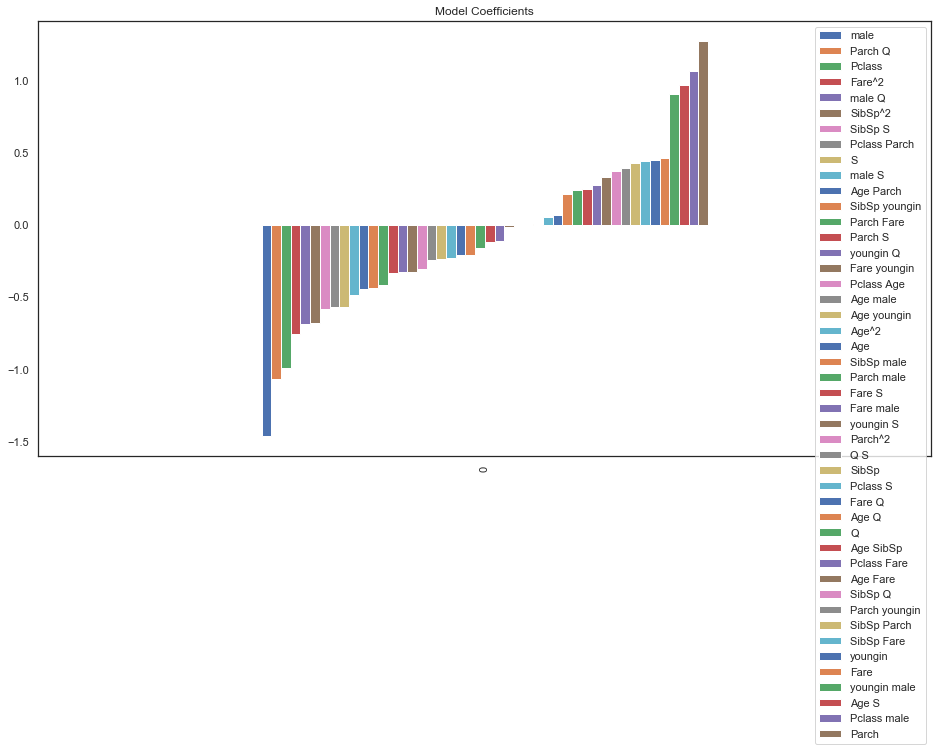

In [39]:
lr_coef_df.plot(kind='bar', title='Model Coefficients', legend=True, figsize=(16,8))

# Efficiently searching for optimal tuning parameters ([video #8](https://www.youtube.com/watch?v=Gol_qOgRqfA&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=8))

Created by [Data School](http://www.dataschool.io/). Watch all 9 videos on [YouTube](https://www.youtube.com/playlist?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A). Download the notebooks from [GitHub](https://github.com/justmarkham/scikit-learn-videos).

**Note:** This notebook uses Python 3.6 and scikit-learn 0.19.1. The original notebook (shown in the video) used Python 2.7 and scikit-learn 0.16, and can be downloaded from the [archive branch](https://github.com/justmarkham/scikit-learn-videos/tree/archive).


## Agenda

- How can K-fold cross-validation be used to search for an **optimal tuning parameter**?
- How can this process be made **more efficient**?
- How do you search for **multiple tuning parameters** at once?
- What do you do with those tuning parameters before making **real predictions**?
- How can the **computational expense** of this process be reduced?

Gridsearch CV is a flexible algorithm in sklearn that allows you to search over multiple hyperparameters for a model, to find which combination of hyperparameters creates a model that performs best along some evaluation metric.

**Read through the documentation for GridsearchCV and determine which parameters are required for the algorithm to run.**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV


In [40]:
#estimator and param grid is required
#change scoring by setting scoring to something
GridSearchCV()

TypeError: __init__() missing 2 required positional arguments: 'estimator' and 'param_grid'

**How do we alter this object in order to use a specific evaluation metric like precision or recall?**


## More efficient parameter tuning using `GridSearchCV`

Allows you to define a **grid of parameters** that will be **searched** using K-fold cross-validation


In [41]:
lrl2 = LogisticRegression()

In [42]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [43]:
param_grid = {'C': c_range }


In [46]:
grid = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, verbose=1)
#could also just put lrl2 as above for the estimator portion

In [47]:
#7 models with 3 folds, 21 different models
# fit the grid with data
grid.fit(X_train, y_train)


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [49]:
grid.cv_results_

{'mean_fit_time': array([0.00247725, 0.0027349 , 0.00574271, 0.00685191, 0.01323032,
        0.02975297, 0.03256512]),
 'std_fit_time': array([0.00098542, 0.0005474 , 0.00140251, 0.00038513, 0.00534322,
        0.00320192, 0.01013485]),
 'mean_score_time': array([0.0032413 , 0.00438182, 0.0017604 , 0.0009625 , 0.0033919 ,
        0.00976499, 0.00676155]),
 'std_score_time': array([0.00192735, 0.00463683, 0.00092126, 0.00030135, 0.00296603,
        0.012664  , 0.00412577]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.76126126, 0.77927928, 0.78378378, 0.8018018 , 0.8018018 ,
        0.7972973 , 0.7972973 ]),
 'split1_test_score': array([0.77927928, 0.81081081, 0.82432432, 0.83783784, 0.82882883,
        0.

In [48]:
# view the results as a pandas DataFrame
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
#mean test score is accuracy
#best fitting is when c is 1

,mean_test_score,std_test_score,params
0,0.777778,0.012916,{'C': 0.001}
1,0.800300,0.014864,{'C': 0.01}
2,0.800300,0.017381,{'C': 0.1}
3,0.809309,0.020913,{'C': 1}
4,0.800300,0.023930,{'C': 10}
5,0.789790,0.024489,{'C': 100}
6,0.788288,0.022969,{'C': 1000}


In [50]:
# examine the first result
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'C': 0.001}
0.7777777777777778


In [51]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)


0.8093093093093093
{'C': 1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
#can do this to predict
grid.best_estimator_.predict


## Searching multiple parameters simultaneously

- **Example:** tuning `max_depth` and `min_samples_leaf` for a `DecisionTreeClassifier`
- Could tune parameters **independently**: change `max_depth` while leaving `min_samples_leaf` at its default value, and vice versa
- But, best performance might be achieved when **neither parameter** is at its default value


In [52]:
# define the parameter values that should be searched
penalty = ['l1', 'l2']

In [53]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid2 = dict(C=c_range, penalty=penalty)
print(param_grid2)

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}


In [ ]:
#example
#can instantiate before with an update and then put in below
#lr_1000=LogisticRegression(max_iter=1000)

In [54]:
grid2 = GridSearchCV(LogisticRegression(), param_grid2, verbose=1, cv=7)


In [55]:
grid2.fit(X_train, y_train)


Fitting 7 folds for each of 14 candidates, totalling 98 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    3.5s finished


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [56]:
# examine the best model
print(grid2.best_score_)
print(grid2.best_params_)
print(grid2.best_estimator_)

0.8108108108108109
{'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


### Your Turn

Use Grid search to find the best hyperparameters for a KNN model. You must use at least 2 different hyperparameters. 

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [2]:
KNeighborsClassifier() #tune n_neighbors #weights = uniform , distance

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [3]:
neighbors=list(range(1,15,2))
algos=['kd_tree','brute']
metrics=['minkowski','manhattan','euclidean']
weights=['uniform','distance']


In [4]:
knn=KNeighborsClassifier()

In [5]:
param_grid_knn = dict(n_neighbors=neighbors, algorithm=algos,metric=metrics)

In [6]:
#your code here
#instantiate grid search object
gridknn=GridSearchCV(knn,param_grid_knn,cv=3,verbose=1)

NameError: name 'GridSearchCV' is not defined

In [71]:
gridknn.fit(X_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    1.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [72]:
# examine the best model
print(gridknn.best_score_)
print(gridknn.best_params_)
print(gridknn.best_estimator_)

0.7957957957957958
{'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 13}
KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


## Reducing computational expense using `RandomizedSearchCV`

- Searching many different parameters at once may be computationally infeasible
- `RandomizedSearchCV` searches a subset of the parameters, and you control the computational "budget"


In [ ]:
#searches different parameters and takes into account budget and how long 

from sklearn.model_selection import RandomizedSearchCV

# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

In [ ]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False)
rand.fit(X, y)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


In [ ]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)


In [ ]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, return_train_score=False)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

## Determine the best model overall

Now we two different models where we have found the optimal parameters for the model. But which model performs better overall?  

How would we solve this question?



In [88]:
#your code here
#use cv to figure out best params, re-fit classifier to all training data or grab best estimator
#predict on test set 
#compare
predictions_l2= grid2.best_estimator_.predict(X_test)

predictions_knn=gridknn.best_estimator_.predict(X_test)

# do accuracy score comparision here with test predictions, metrics.f

## Resources

- scikit-learn documentation: [Grid search](http://scikit-learn.org/stable/modules/grid_search.html), [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- Timed example: [Comparing randomized search and grid search](http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html)
- scikit-learn workshop by Andreas Mueller: [Video segment on randomized search](https://youtu.be/0wUF_Ov8b0A?t=17m38s) (3 minutes), [related notebook](https://github.com/amueller/pydata-nyc-advanced-sklearn/blob/master/Chapter%203%20-%20Randomized%20Hyper%20Parameter%20Search.ipynb)
- Paper by Yoshua Bengio: [Random Search for Hyper-Parameter Optimization](http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)